### Loading and playing with a sample dataset

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from joblib import dump, load
import os
import sys

import display_image

In [2]:
iris = datasets.load_iris()

In [3]:
digits = datasets.load_digits()

In [4]:
# Gives the image data for the 12th image in the set
print(digits.data[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [5]:
digits.target[1]

1

In [6]:
print(digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


### Fitting an estimator

##### Training AKA Fitting the estimator. Feed the training data into the particular algorithm/approach --> calculate loss compared to actual


In [7]:
from sklearn import svm
import numpy as np

# In this case, we want to CLASSIFY future test inputs
# Therefore, we can use the Support Vector Classifier of the 
# ... Support Vector Machine
clf = svm.SVC(gamma=0.001, C=100.0)

# Fit all but the last value in the training set.
# We'll use this as a test input
clf.fit(digits.data[:-1], digits.target[:-1])
digits.target[:-1]
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [8]:
clf.predict(digits.data[-1:])

array([8])

In [9]:
print(digits.images[8])

[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]


In [10]:
digits.target[8]

8

In [11]:
print(digits.data[-1:])

[[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
  15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
  15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
   8.  0.  0.  1.  8. 12. 14. 12.  1.  0.]]


In [12]:
from mnist import MNIST

mndata = MNIST('/home/td_mcleod/Downloads/', return_type="numpy")
mndata.gz = True

IMAGE_DIMENSIONS = (28,28)

images, labels = mndata.load_training()

In [13]:
# Initialize the SVM classifier and train the estimator
# using the "fit" method
# Uncomment the below lines if we want to retrain the estimator

# zz = svm.SVC()
# zz.fit(images, labels)

# OTHERWISE, just load the pretrained model
zz = load('hw_predict.joblib')

In [14]:
# Load the mnist test data
tst_data, tst_labels = mndata.load_testing()

In [19]:
# Small scale test of the estimator
# Not too shabby!
t_labels = np.array(tst_labels[:5000])
t_predict = np.array(zz.predict(tst_data[:5000]))



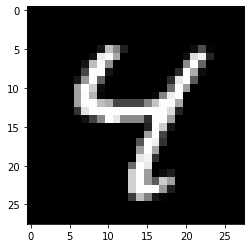

Error Rate = 3.0%


In [20]:
display_image.display_image_from_array(tst_data[6], IMAGE_DIMENSIONS)


# Calculate the accuracy
total_err = sum(list(map(lambda x: 0 if x[0]==x[1] else 1,zip(t_labels,t_predict))))
err_rate = (total_err/float(len(t_labels)) * 100)
print("Error Rate = {}%".format(100.0-err_rate))

In [17]:
print(tst_data.shape)
print(tst_labels.shape)

# The inbuilt train_test_split function splits data evenly into a training set with
# the values of 
# X_train, X_test, y_train, y_test = train_test_split(tst_data, tst_labels)



(10000, 784)
(10000,)
(1000, 784)
(1000,)


array([[ 84,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 125,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 113,   0,   0,   0,   0,   1,   0,   1],
       [  0,   0,   0, 106,   0,   0,   0,   1,   0,   0],
       [  0,   0,   1,   0, 106,   0,   0,   0,   0,   3],
       [  0,   0,   0,   1,   0,  84,   1,   0,   1,   0],
       [  3,   0,   0,   0,   0,   0,  84,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,   0,  97,   0,   0],
       [  0,   0,   2,   1,   1,   0,   0,   1,  83,   1],
       [  0,   0,   0,   0,   0,   0,   0,   1,   3,  90]])

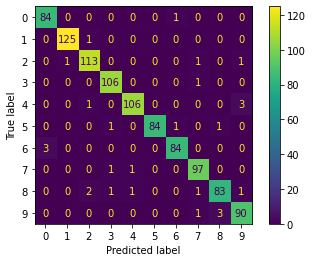

In [18]:
disp = metrics.plot_confusion_matrix(zz, tst_data[:1000], tst_labels[:1000])
disp.confusion_matrix